<a href="https://colab.research.google.com/github/ElynZeng/QM2-PROJECT/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/Data/"

files = {
    "Vietnam": "Vietnam_Data_cleaned.csv",
    "China": "China_Data_cleaned.csv",
    "Indonesia": "Indonesia_Data_cleaned.csv",
    "Korea": "Korea_Data_cleaned.csv",
    "Japan": "Japan_Data_cleaned.csv",
    "Malaysia": "Malaysia_Data_cleaned.csv",
    "Thailand": "Thailand_Data_cleaned.csv"
}

dfs = []

for country, file in files.items():
    temp = pd.read_csv(data_dir + file)
    temp["COUNTRY"] = country
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)

df["income_group"] = (
    df.groupby("COUNTRY")["GDP PER CAPITA"]
      .transform(lambda x: x < x.median())
)

df["income_group"] = df["income_group"].map({
    True: "Low income",
    False: "High income"
})


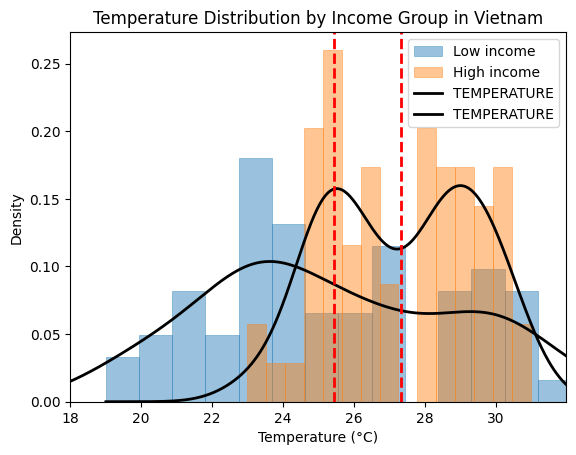

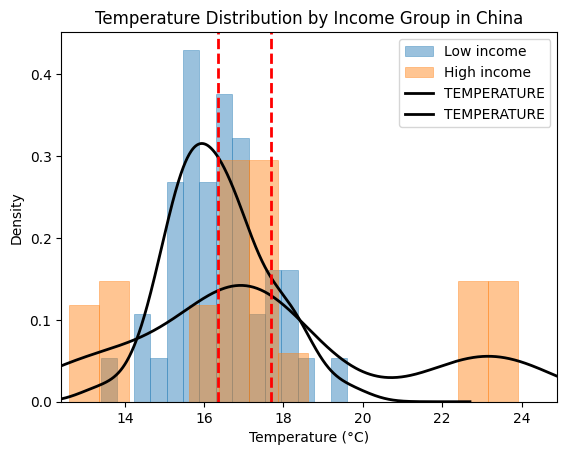

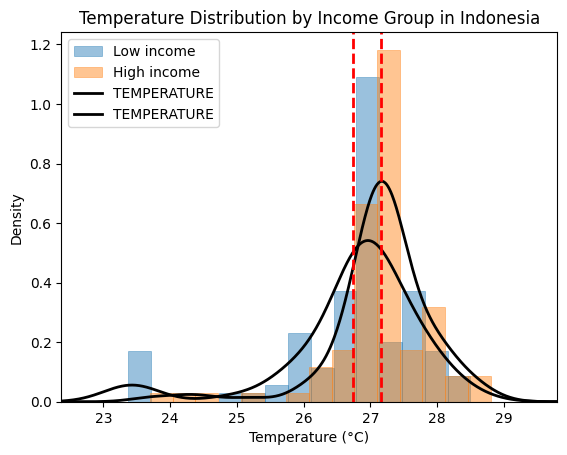

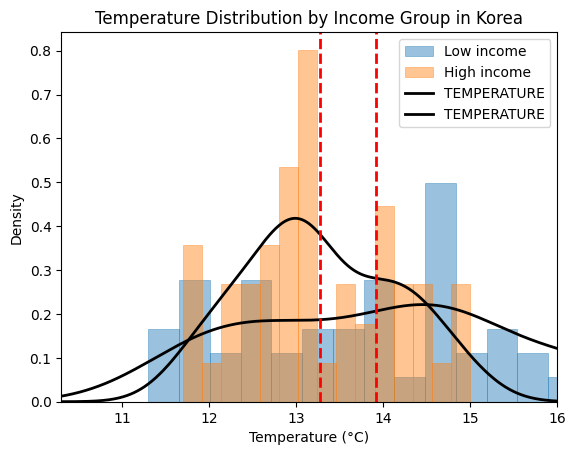

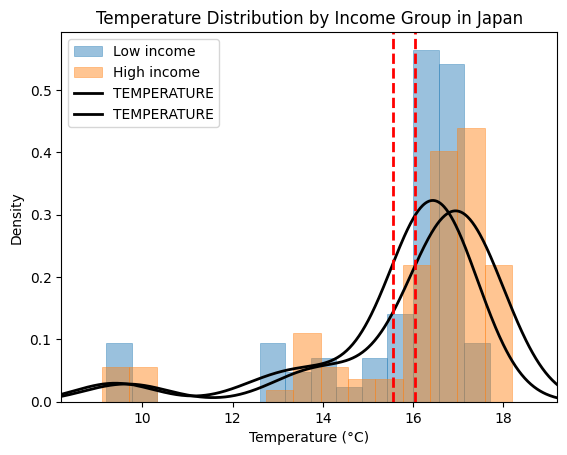

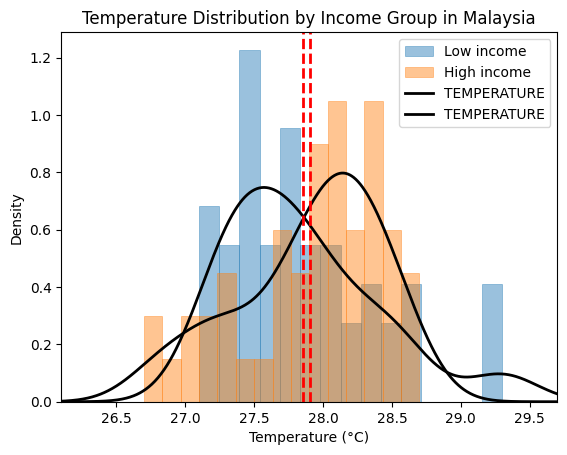

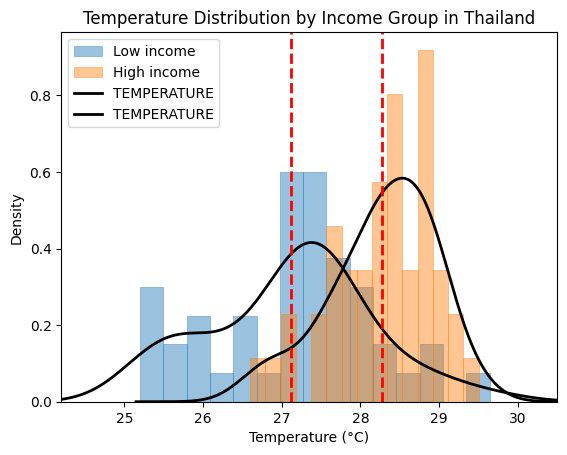

In [3]:
for country in df["COUNTRY"].unique():
    country_df = df[df["COUNTRY"] == country]

    low = country_df[country_df["income_group"] == "Low income"]["TEMPERATURE"]
    high = country_df[country_df["income_group"] == "High income"]["TEMPERATURE"]

    plt.figure()

    plt.hist(
        low,
        bins=15,
        density=True,
        alpha=0.45,
        color="tab:blue",
        edgecolor="tab:blue",
        linewidth=0.6,
        label="Low income"
    )

    plt.hist(
        high,
        bins=15,
        density=True,
        alpha=0.45,
        color="tab:orange",
        edgecolor="tab:orange",
        linewidth=0.6,
        label="High income"
    )

    low.plot(kind="kde", color="black", linewidth=2)
    high.plot(kind="kde", color="black", linewidth=2)

    plt.axvline(low.mean(), color="red", linestyle="--", linewidth=2)
    plt.axvline(high.mean(), color="red", linestyle="--", linewidth=2)

    plt.xlim(low.min() - 1, high.max() + 1)


    plt.xlabel("Temperature (°C)")
    plt.ylabel("Density")
    plt.title(f"Temperature Distribution by Income Group in {country}")
    plt.legend()
    plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


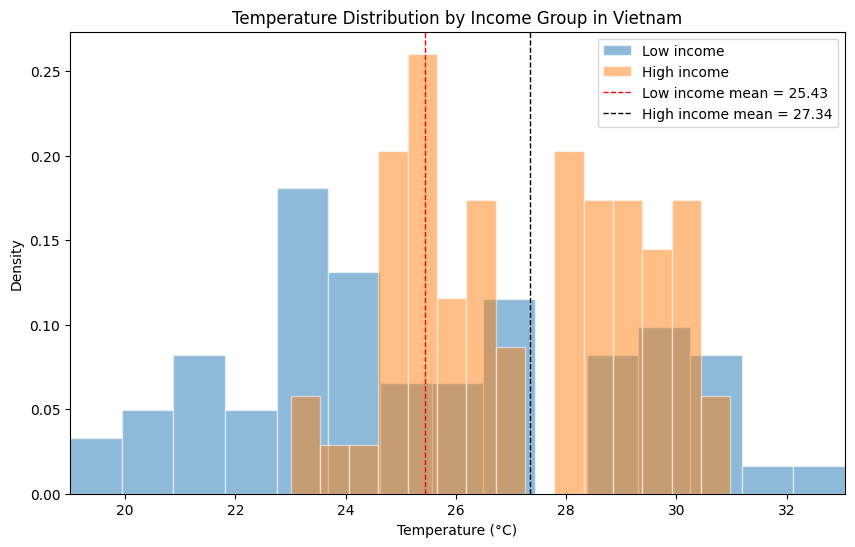

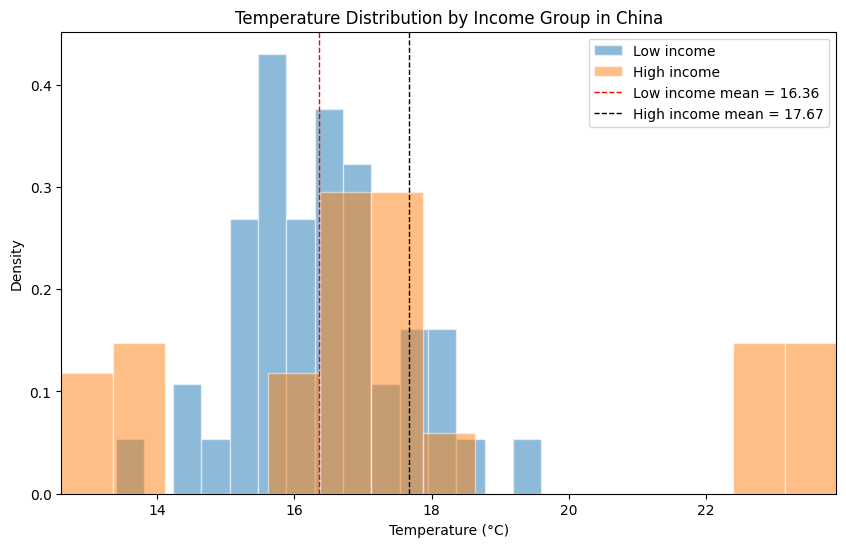

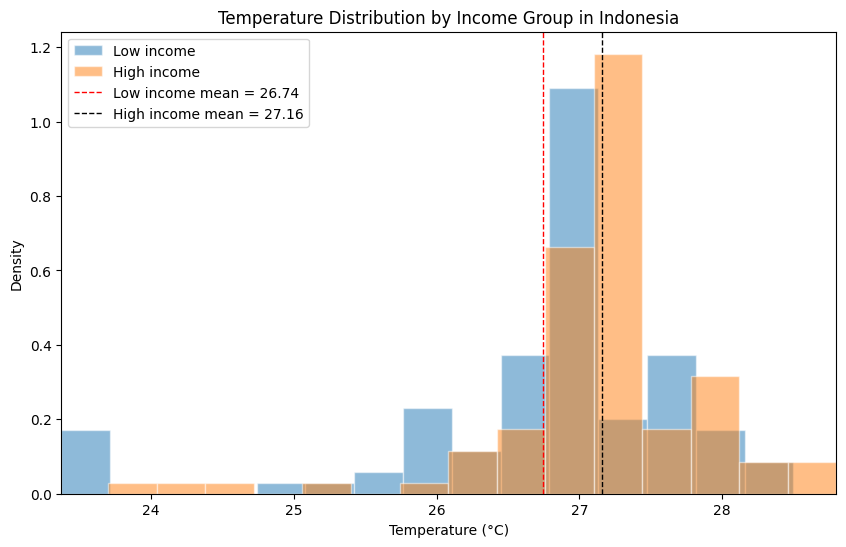

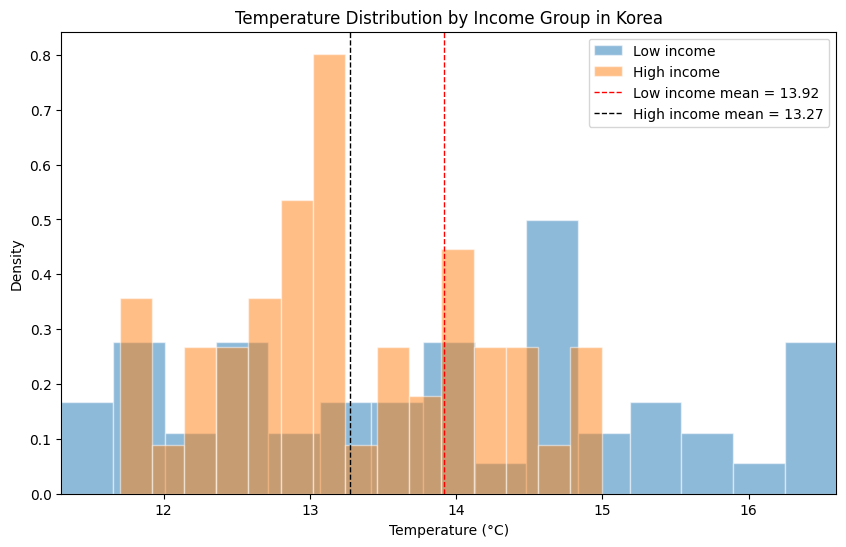

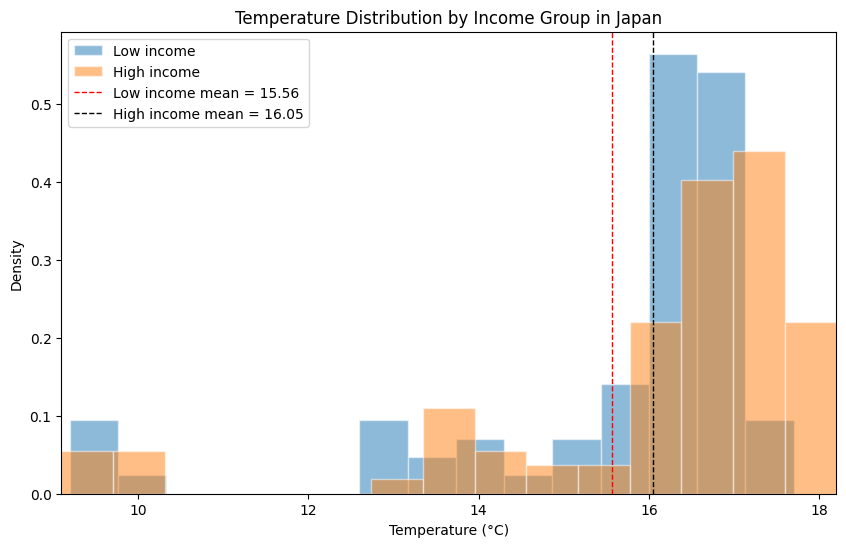

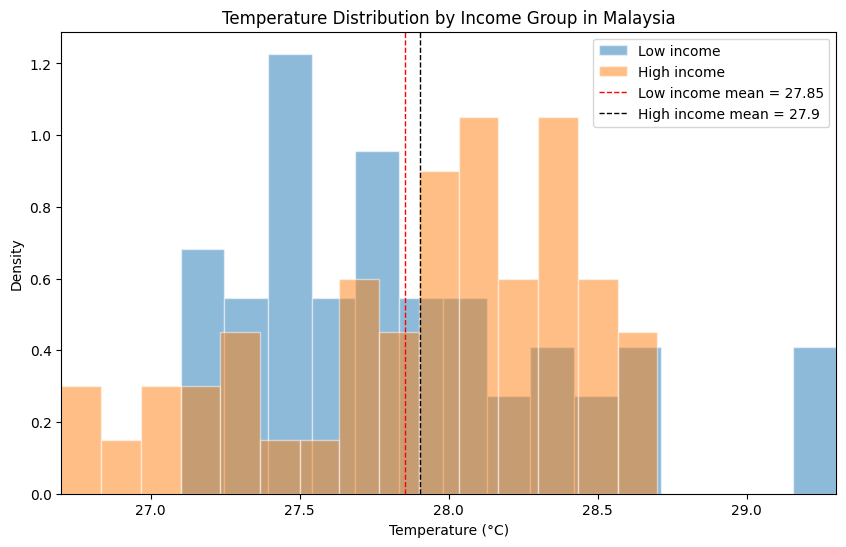

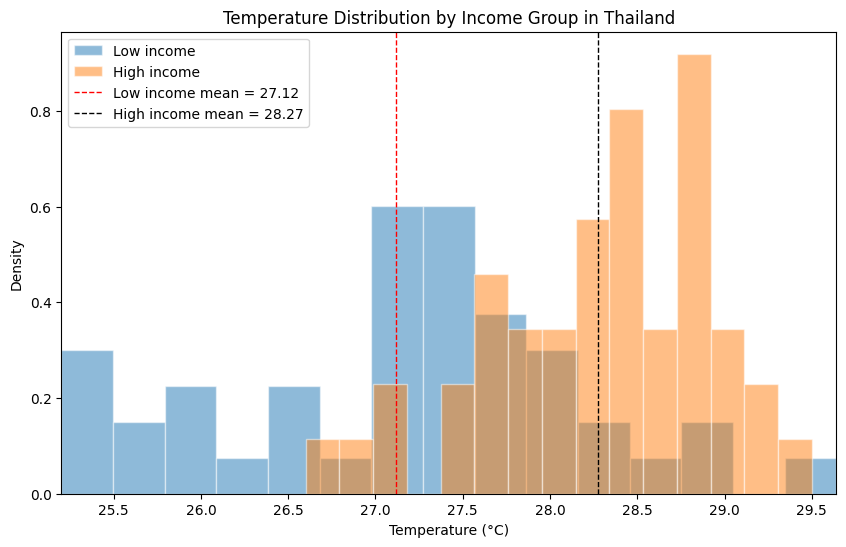

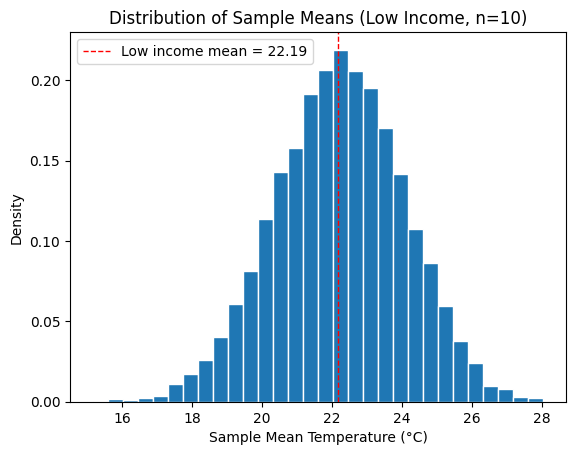

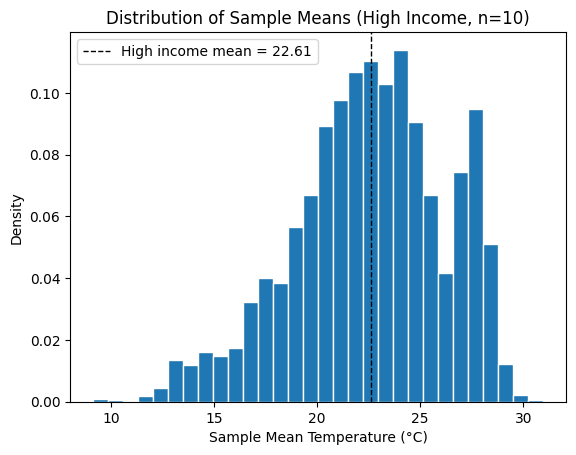

In [20]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_dir = "/content/drive/MyDrive/Data/"

files = {
    "Vietnam": "Vietnam_Data_cleaned.csv",
    "China": "China_Data_cleaned.csv",
    "Indonesia": "Indonesia_Data_cleaned.csv",
    "Korea": "Korea_Data_cleaned.csv",
    "Japan": "Japan_Data_cleaned.csv",
    "Malaysia": "Malaysia_Data_cleaned.csv",
    "Thailand": "Thailand_Data_cleaned.csv"
}

dfs = []

for country in files:
    temp = pd.read_csv(data_dir + files[country])
    temp["COUNTRY"] = country
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)


df["income_group"] = (
    df.groupby("COUNTRY")["GDP PER CAPITA"]
      .transform(lambda x: x < x.median())
)

df["income_group"] = df["income_group"].map({
    True: "Low income",
    False: "High income"
})


for country in df["COUNTRY"].unique():

    country_df = df[df["COUNTRY"] == country]

    low = country_df[country_df["income_group"] == "Low income"]["TEMPERATURE"]
    high = country_df[country_df["income_group"] == "High income"]["TEMPERATURE"]

    plt.figure(figsize=(10,6))


    plt.hist(low, bins=15, density=True, alpha=0.5,
             edgecolor='white', label='Low income')

    plt.hist(high, bins=15, density=True, alpha=0.5,
             edgecolor='white', label='High income')

    low_mean = low.mean()
    high_mean = high.mean()

    plt.axvline(low_mean,
                color='red',
                linestyle='dashed',
                linewidth=1,
                label='Low income mean = ' + str(round(low_mean, 2)))

    plt.axvline(high_mean,
                color='black',
                linestyle='dashed',
                linewidth=1,
                label='High income mean = ' + str(round(high_mean, 2)))

    plt.xlabel("Temperature (°C)")
    plt.ylabel("Density")
    plt.title("Temperature Distribution by Income Group in " + country)

    combined = pd.concat([low, high])

    plt.xlim(combined.min(), combined.max())

    plt.legend()
    plt.show()


sample_size = 10

low_all = df[df["income_group"] == "Low income"]["TEMPERATURE"]
high_all = df[df["income_group"] == "High income"]["TEMPERATURE"]


sample_means_low = []

for i in range(10000):
    sample = low_all.sample(sample_size, replace=True)
    sample_means_low.append(sample.mean())

low_mean_all = low_all.mean()

plt.hist(sample_means_low, bins=30, edgecolor='white', density=True)

plt.axvline(low_mean_all,
            color='red',
            linestyle='dashed',
            linewidth=1,
            label='Low income mean = ' + str(round(low_mean_all, 2)))

plt.xlabel("Sample Mean Temperature (°C)")
plt.ylabel("Density")
plt.title("Distribution of Sample Means (Low Income, n=10)")
plt.legend()
plt.show()


sample_means_high = []

for i in range(10000):
    sample = high_all.sample(sample_size, replace=True)
    sample_means_high.append(sample.mean())

high_mean_all = high_all.mean()

plt.hist(sample_means_high, bins=30, edgecolor='white', density=True)

plt.axvline(high_mean_all,
            color='black',
            linestyle='dashed',
            linewidth=1,
            label='High income mean = ' + str(round(high_mean_all, 2)))

plt.xlabel("Sample Mean Temperature (°C)")
plt.ylabel("Density")
plt.title("Distribution of Sample Means (High Income, n=10)")
plt.legend()
plt.show()


